**In this notebook, I demonstrate the simple Linear Regression model using a short ([dataset](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression)) from Kaggle.** 
**All calculations are performed from scratch using the NumPy library basing on the Stanford ML course intuition with the assistance of ChatGPT❤️.**

**<font color='#FF1493'>Let's get started!</font>** 🙋🏻‍♀️

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from simple_colors import * # It's a library to print colorful outputs

In [94]:
#Load dataset
df=pd.read_csv('Salary_Data.csv')

**The dataset includes 30 entries and two columns: the number of years and months an employee has worked in the company, and the corresponding salary value:**

In [95]:
print(df.head(5))
print(green('--------------------------------------------------'))
print(df.info())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


**Now, let's assign the <font color='blue'>'YearsExperience'</font> column as the value <font color='green'>x</font>  and the <font color='blue'>'Salary'</font> column as <font color='green'>y</font>. Plot them and compute correlation:** 

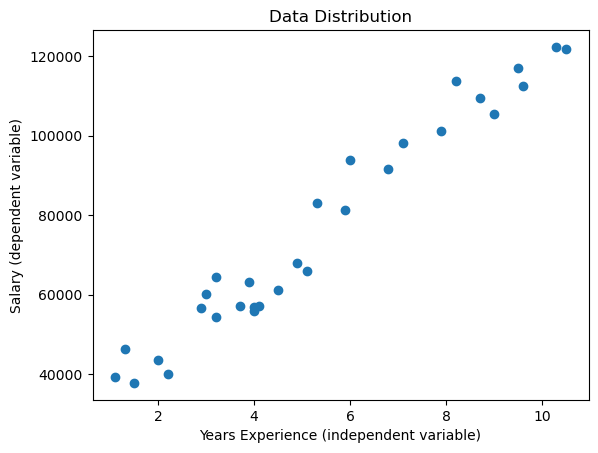

Correlation between the salary and the time an employee has worked for the company is equal to 98 %


In [98]:
x=df['YearsExperience']
y=df['Salary']

plt.scatter(x, y) 
plt.xlabel('Years Experience (independent variable)')
plt.ylabel('Salary (dependent variable)')
plt.title('Data Distribution')
plt.show()

print(red(f"Correlation between the salary and the time an employee has worked for the company is equal to {round(x.corr(y)*100)} %"))

***


**The next step we create Linear Regression model <font color='violet'>$(wx+b)$</font> and place the sum of traning examples it inside the Loss function: $$\frac{1}{2m} \sum_{i=1}^{m} ({y}_{\text{predicted}}^{(i)} - y^{(i)})^2$$ Thus we construct the Cost Function,that returns the value of Least Squared Error(LSE) for the given parameters: $$\frac{1}{2m} \sum\limits_{i=1}^{m}((wx+b)^{(i)}-y^{(i)})^2$$** 
<mark>x: the array of training data points
<br>
  y: the array of actual output values 
<br>
  y_predicted: the array of predicted output values 
<br>
<br>
  m: the number of training examples
<br>
  i: the size of the step(equals to 1)
<br>
<br>
  w: the slope of the regression line(weight)
<br>
  b: the intercept between the data point and the regression line(bias)</mark>


In [106]:
#Convert x & y into a numpy array
x = np.array(x)
y = np.array(y)

# Initialize parameters (weights and bias)
w = 0.0
b = 0.0

#Build cost function
def compute_cost(x, y, w, b):
    num_samples = len(x)
    predicted_values = w * x + b
    cost = (1 / (2 * num_samples)) * np.sum((predicted_values - y) ** 2)
    return cost

**Then we construct Gradient Descent optimization algorithm by setting $dw=\frac{1}{m}(\sum\limits_{i=1}^{m}((wx+b)^{(i)}-y)*x$ as the gradient of the parameter <font color='violet'>w</font>, and $db=\frac{1}{m}(\sum\limits_{i=1}^{m}((wx+b)^{(i)}-y)$ as <font color='violet'>b</font>.** 
<br>
**The goal is find the most suitable <font color='violet'>w</font> and <font color='violet'>b</font> by minimizing the Cost Funtion.
<br>
In this code we picked 10 learning rate <font color='blue'>$\alpha$</font> values to iterate over and assign the best fit to <font color='violet'>w</font> and <font color='violet'>b</font>:
<br>
$w=\alpha*dw$
<br>
$b=\alpha*db$**

In [107]:
#Set learning rate and number of iterations
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001, 0.0000000001]
num_iterations = 1000

# Implement gradient descent
def gradient_descent(x, y, w, b, learning_rate, num_iterations):
    num_samples = len(x)
    lowest_cost = float('inf')
    best_w = w
    best_b = b
    
    for i in range(num_iterations):
        predicted_values = w * x + b
        dw = (1 / num_samples) * np.sum((predicted_values - y) * x)
        db = (1 / num_samples) * np.sum(predicted_values - y)
        w -= learning_rate * dw
        b -= learning_rate * db
        cost = compute_cost(x, y, w, b)

        if cost < lowest_cost:
            lowest_cost = cost
            best_w = w
            best_b = b
        
    return best_w, best_b

In [108]:
# Iterate over different learning rates
best_w = 0.0
best_b = 0.0
lowest_cost = float('inf')

for learning_rate in learning_rates:
    # Reset parameters to initial values
    w = 0.0
    b = 0.0
    
    # Perform gradient descent
    print(f"Learning Rate: {learning_rate}")
    w, b = gradient_descent(x, y, w, b, learning_rate, num_iterations)
    cost = compute_cost(x, y, w, b)
    
    if cost < lowest_cost:
        lowest_cost = cost
        best_w = w
        best_b = b

    print(f"Final Parameters with Learning Rate {learning_rate}: w = {w}, b = {b}")
    print()

# Print the final model parameters with the lowest cost
print(red(f"Final Parameters with Lowest Cost: w = {best_w}, b = {best_b}"))

Learning Rate: 0.1
Final Parameters with Learning Rate 0.1: w = 47739.87, b = 7600.3

Learning Rate: 0.01
Final Parameters with Learning Rate 0.01: w = 9876.112752879602, b = 22920.485548522254

Learning Rate: 0.001
Final Parameters with Learning Rate 0.001: w = 12316.105337681542, b = 6478.02313307499

Learning Rate: 0.0001
Final Parameters with Learning Rate 0.0001: w = 12591.912927045256, b = 2379.077646601333

Learning Rate: 1e-05
Final Parameters with Learning Rate 1e-05: w = 3993.396101022034, b = 644.1391086536734

Learning Rate: 1e-06
Final Parameters with Learning Rate 1e-06: w = 468.7150770296096, b = 74.71384166143028

Learning Rate: 1e-07
Final Parameters with Learning Rate 1e-07: w = 47.652074824108496, b = 7.587266112669596

Learning Rate: 1e-08
Final Parameters with Learning Rate 1e-08: w = 4.773108080568828, b = 0.7598995175278394

Learning Rate: 1e-09
Final Parameters with Learning Rate 1e-09: w = 0.47738990983713675, b = 0.07600169503154912

Learning Rate: 1e-10
Final

/var/folders/6m/nqvxdq1n5j99ncs264mz0l0r0000gn/T/ipykernel_5610/1569253834.py:13: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * num_samples)) * np.sum((predicted_values - y) ** 2)
/var/folders/6m/nqvxdq1n5j99ncs264mz0l0r0000gn/T/ipykernel_5610/2822651418.py:16: RuntimeWarning: invalid value encountered in scalar subtract
  w -= learning_rate * dw


**Let's plot the fitted model:**

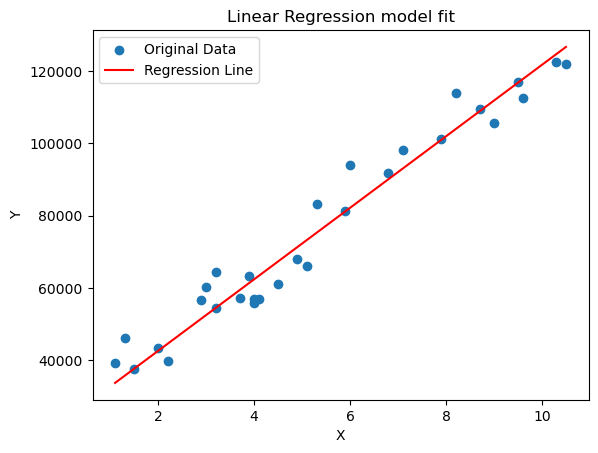

Final Parameters with Lowest Cost: w = 9876.112752879602, b = 22920.485548522254


In [109]:
#Set w & w to their best fit
w = best_w
b = best_b

#Create a plot
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = w * x_line + b

plt.scatter(x, y, label='Original Data')
plt.plot(x_line,y_line, color='red', label='Regression Line')
plt.title('Linear Regression model fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print(red(f"Final Parameters with Lowest Cost: w = {best_w}, b = {best_b}"))

***

**The final step is to perform prediction and check model accuracy** 

In [110]:
def prediction(x):
    y_pred = best_w * x + best_b
    return y_pred

In [111]:
ypred=prediction(x)

Numerical difference between the predicted output and the actual label for each entity: 
[-5.55879042e+03 -1.04455679e+04  3.65467784e+00 -8.52288946e+02
  4.75693360e+03 -5.08078747e+03 -7.60117619e+03  7.90463577e+01
 -9.92095364e+03  2.27310273e+03 -1.78067472e+03  6.63093656e+03
  5.46793656e+03  6.33154784e+03  6.25199294e+03  3.37543804e+03
  7.25966059e+03 -7.82411686e+03 -1.73449209e+02 -1.17628379e+04
 -1.65994773e+03 -5.23211391e+03 -3.60223704e+02 -9.90738988e+03
 -5.88333501e+02  6.22350032e+03 -2.25443299e+02  5.09616798e+03
  2.25344690e+03  4.74766945e+03]
 --------------------------------------------------------------------------------------


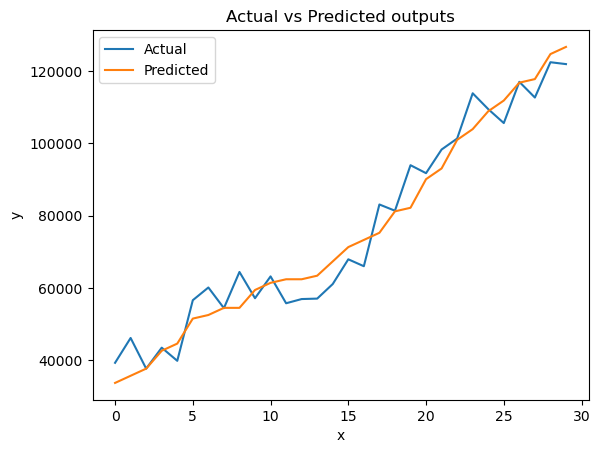

In [112]:
print(red('Numerical difference between the predicted output and the actual label for each entity:'),f"\n{ypred-y}\n --------------------------------------------------------------------------------------")

#Create a plot
plt.plot(y, label='Actual')
plt.plot(ypred, label='Predicted')

plt.title('Actual vs Predicted outputs')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**As this is a simple task - we decided not to include cross-validation, regularization and other techniques into this notebook!** 